In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st



In [2]:
# Data files
beers_data_path = "data/beers_kaggle.csv"
breweries_data_path = "data/breweries_kaggle.csv"
breweries_and_pubs_data_path = "data/craft_beer_dataworld.csv"
cities_population_data_path = "data/cities_population.csv"

# Read the beers and breweries files
beers_data = pd.read_csv(beers_data_path)
breweries_data = pd.read_csv(breweries_data_path)
b_and_p_data = pd.read_csv(breweries_and_pubs_data_path)
cities_pop = pd.read_csv(cities_population_data_path)


In [3]:
beers_data.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


### Updating Beers data table to remove duplicate index column.

In [4]:
beers_data.drop(["Unnamed: 0", "ibu", "id"], axis =1, inplace = True)

In [5]:
beers_data.head()

,abv,name,style,brewery_id,ounces
0,0.050,Pub Beer,American Pale Lager,408,12.0
1,0.066,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,Rise of the Phoenix,American IPA,177,12.0
3,0.090,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,Sex and Candy,American IPA,177,12.0


In [6]:
breweries_data.head()

,Unnamed: 0,name,city,state
0,286,Back Forty Beer Company,Gadsden,Alabama
1,412,Straight to Ale,Huntsville,Alabama
2,478,Good People Brewing Company,Birmingham,Alabama
3,102,King Street Brewing Company,Anchorage,Alaska
4,223,Midnight Sun Brewing Company,Anchorage,Alaska


### Updating Breweries data table to remove duplicate index column.

In [7]:
breweries_data.drop(["Unnamed: 0"], axis =1, inplace = True)

In [8]:
breweries_data.head()

,name,city,state
0,Back Forty Beer Company,Gadsden,Alabama
1,Straight to Ale,Huntsville,Alabama
2,Good People Brewing Company,Birmingham,Alabama
3,King Street Brewing Company,Anchorage,Alaska
4,Midnight Sun Brewing Company,Anchorage,Alaska


In [9]:
b_and_p_data.head()

,id,address,categories,city,country,hours,keys,latitude,longitude,menus,name,postalCode,province,twitter,websites
0,AVweN1T_ByjofQCxwSPL,Syr Airport,Brewery,Syracuse,US,NaN,us/ny/syracuse/syrairport/2098450797,NaN,NaN,NaN,Adirondack Pub,NaN,NY,NaN,NaN
1,AVwdkF9ZIN2L1WUfxDfw,1320 N Doctor Martin Luther King Dr,Office and Cafeteria Brewer's Hill,Milwaukee,US,NaN,us/wi/milwaukee/1320ndoctormartinlutherkingdr/...,NaN,NaN,NaN,The Waterfront Cafe,53212,WI,NaN,NaN
2,AVwdlPkf_7pvs4fz7TMr,608 4th St,Brewery Downtown Clovis,Clovis,US,"[{""day"":""Wed - Sat"",""hour"":""5:00 PM - 8:00 PM""}]",us/ca/clovis/6084thst/-932885010,NaN,NaN,NaN,559 Local Brewing,93612,CA,NaN,http://fresnobrewing.com
3,AVwcucY0kufWRAb5yWbU,1103 Mills St,breweries & brew pubs,Black Earth,US,NaN,us/wi/blackearth/1103millsst/-757413411,43.138995,-89.747904,NaN,Shack The,53515-9454,WI,NaN,NaN
4,AVweCkd5kufWRAb5_eaI,130 W Riverside Dr,Brewery and Gastropub Downtown Jeffersonville,Jeffersonville,US,"[{""day"":""Wed - Thu"",""hour"":""3:00 PM - 9:00 PM""...",us/utica/jeffersonville/130wriversidedr/787280564,NaN,NaN,NaN,Flat12 Bierworks,47130,Utica,flat12bierwerks,http://flat12.me/brewery


### Dropping unnecessary data columns from the Breweries and Pubs dataframe.

In [10]:
b_and_p_data.drop(["id", "address", "country", "hours", "keys", "latitude", "longitude", "menus", "postalCode", "twitter", "websites"], axis =1, inplace = True)

In [11]:
b_and_p_data.head()

,categories,city,name,province
0,Brewery,Syracuse,Adirondack Pub,NY
1,Office and Cafeteria Brewer's Hill,Milwaukee,The Waterfront Cafe,WI
2,Brewery Downtown Clovis,Clovis,559 Local Brewing,CA
3,breweries & brew pubs,Black Earth,Shack The,WI
4,Brewery and Gastropub Downtown Jeffersonville,Jeffersonville,Flat12 Bierworks,Utica


### I realized that there was more than just Breweries and Pubs listed in the data frames categories so I decided to see what other categories were listed to know if this was a data frame we could use to merge. After realizing that this data frame also included additional categories such as Wineries, Vineyards, Brewer Equipment Supplies, and Grocery Stores, I decided that this data frame would not be usable for this project as it would take too long to clean the data in order for it to be useful. 

In [12]:
b_and_p_data['categories'].value_counts()

Brewers                                                                                                                                                                                                                                                          2727
Brewery                                                                                                                                                                                                                                                          2053
Wineries,Brewers                                                                                                                                                                                                                                                  325
Wineries,Vineyards,Brewers                                                                                                                                                                                            

### Needing to organize the Breweries data frame in order to make it useful for answering the question of most breweries per capita.

In [13]:
city_br = breweries_data.groupby(['city', 'state']).count()
city_br

,,name
city,state,
Abingdon,Virginia,1
Abita Springs,Louisiana,1
Ada,Michigan,1
Afton,Virginia,1
Airway Heights,Washington,1
...,...,...
Woodinville,Washington,2
Worcester,Massachusets,1
Yakima,Washington,1


In [14]:
city_br = city_br.reset_index()

city_br

,city,state,name
0,Abingdon,Virginia,1
1,Abita Springs,Louisiana,1
2,Ada,Michigan,1
3,Afton,Virginia,1
4,Airway Heights,Washington,1
...,...,...,...
396,Woodinville,Washington,2
397,Worcester,Massachusets,1
398,Yakima,Washington,1
399,Yardley,Pennsylvania,1


### Needing to narrow down the data frame to only cities with 3 or more breweries in order to make the data cleaner and easier to analyze and be able to present our findings.

In [15]:
city_br = city_br.loc[city_br["name"]>2]
city_br

,city,state,name
5,Albuquerque,New Mexico,3
7,Anchorage,Alaska,4
24,Austin,Texas,8
26,Baltimore,Maryland,3
34,Bend,Oregon,6
47,Boulder,Colorado,9
54,Brooklyn,New York,4
67,Charlotte,North Carolina,3
73,Chicago,Illinois,9
75,Cincinnati,Ohio,4


### Having the towns listed in order from greatest to smallest number of breweries.

In [16]:
cities_totals = city_br.sort_values('name', ascending=False)
cities_totals

,city,state,name
293,Portland,Oregon,11
47,Boulder,Colorado,9
73,Chicago,Illinois,9
320,Seattle,Washington,9
24,Austin,Texas,8
96,Denver,Colorado,8
313,San Diego,California,8
34,Bend,Oregon,6
292,Portland,Maine,6
314,San Francisco,California,5


### Needing to update the column names so that we can merge with the other data frame on common keys.

In [17]:
cities_totals.rename({'name':'Breweries', 'city':'City', 'state':'State'}, axis=1, inplace=True)
cities_totals.head()

,City,State,Breweries
293,Portland,Oregon,11
47,Boulder,Colorado,9
73,Chicago,Illinois,9
320,Seattle,Washington,9
24,Austin,Texas,8


### I decided to plot the data in order to get a better understanding of how to present it.

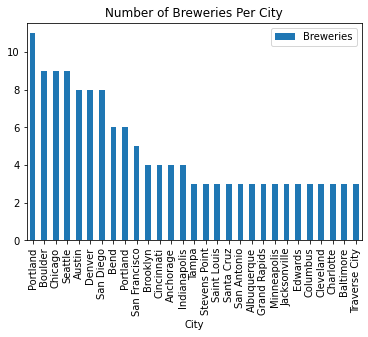

In [18]:
city_plot = cities_totals.plot.bar(x='City', y='Breweries', title = "Number of Breweries Per City")

### Now it was time to clean the population data frame from the Census in order to be able to calculate the breweries per capita values.

In [19]:
cities_pop = pd.read_csv(cities_population_data_path)

In [20]:
cities_pop.head()

,Rank,Geographic Area,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,1,"New York city, New York","8,175,133","8,175,031","8,190,209","8,272,948","8,346,693","8,396,091","8,433,806","8,463,049","8,469,153","8,437,478","8,390,081","8,336,817"
1,2,"Los Angeles city, California","3,792,621","3,793,139","3,795,512","3,820,876","3,851,202","3,881,622","3,909,901","3,938,568","3,963,226","3,975,788","3,977,596","3,979,576"
2,3,"Chicago city, Illinois","2,695,598","2,695,652","2,697,477","2,708,114","2,719,141","2,725,731","2,727,066","2,724,344","2,716,723","2,711,069","2,701,423","2,693,976"
3,4,"Houston city, Texas","2,099,451","2,095,517","2,100,280","2,126,032","2,161,593","2,199,391","2,241,826","2,286,908","2,309,544","2,316,750","2,318,573","2,320,268"
4,5,"Phoenix city, Arizona","1,445,632","1,446,691","1,449,038","1,469,796","1,499,274","1,526,491","1,555,445","1,583,690","1,612,199","1,633,560","1,654,675","1,680,992"


### Needing to splite the values in the Geographic Area column of the data frame into their City and State values and add those columns into the data frame. 

In [21]:
cities_pop['City'], cities_pop['State'] = cities_pop['Geographic Area'].str.split(',', 1).str

C:\Users\paul_\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


### Now I decided to drop that column as it was not longer useful.

In [22]:
cities_pop.drop(["Geographic Area"], axis =1, inplace = True)

### I noticed that in the City column there was either an extra "city", "town", or "village" added to the name of most cities in the data frame so I added code to delete this unnecessary information.

In [23]:
cities_pop['City'] = cities_pop['City'].str.replace("city", "")

In [24]:
cities_pop['City'] = cities_pop['City'].str.replace("town", "")

In [25]:
cities_pop['City'] = cities_pop['City'].str.replace("village", "")

### Now the data frame had the "City" and "State" values I needed. 

In [26]:
cities_pop.head()

,Rank,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,City,State
0,1,"8,175,133","8,175,031","8,190,209","8,272,948","8,346,693","8,396,091","8,433,806","8,463,049","8,469,153","8,437,478","8,390,081","8,336,817",New York,New York
1,2,"3,792,621","3,793,139","3,795,512","3,820,876","3,851,202","3,881,622","3,909,901","3,938,568","3,963,226","3,975,788","3,977,596","3,979,576",Los Angeles,California
2,3,"2,695,598","2,695,652","2,697,477","2,708,114","2,719,141","2,725,731","2,727,066","2,724,344","2,716,723","2,711,069","2,701,423","2,693,976",Chicago,Illinois
3,4,"2,099,451","2,095,517","2,100,280","2,126,032","2,161,593","2,199,391","2,241,826","2,286,908","2,309,544","2,316,750","2,318,573","2,320,268",Houston,Texas
4,5,"1,445,632","1,446,691","1,449,038","1,469,796","1,499,274","1,526,491","1,555,445","1,583,690","1,612,199","1,633,560","1,654,675","1,680,992",Phoenix,Arizona


### I needed to narrow the data frame down to just the City, State, and 2017 Population Data I needed as that was the year that Breweries data frame data was created.

In [27]:
city_population_2017 = cities_pop.loc[:, [ "City", "State", "2017"]]

In [28]:
city_population_2017

,City,State,2017
0,New York,New York,"8,437,478"
1,Los Angeles,California,"3,975,788"
2,Chicago,Illinois,"2,711,069"
3,Houston,Texas,"2,316,750"
4,Phoenix,Arizona,"1,633,560"
...,...,...,...
783,Lakewood,Ohio,"50,211"
784,Troy,New York,"49,433"
785,Saginaw,Michigan,"48,696"
786,Niagara Falls,New York,"48,249"


### Before merging the data frames I needed to clean the Breweries data frame as I was hoping to calculate the breweries per capita for all the cities listed in the Breweries data frame.

In [29]:
breweries_data

,name,city,state
0,Back Forty Beer Company,Gadsden,Alabama
1,Straight to Ale,Huntsville,Alabama
2,Good People Brewing Company,Birmingham,Alabama
3,King Street Brewing Company,Anchorage,Alaska
4,Midnight Sun Brewing Company,Anchorage,Alaska
...,...,...,...
553,Dave's Brewfarm,Wilson,Wisconsin
554,Black Tooth Brewing Company,Sheridan,Wyoming
555,Snake River Brewing Company,Jackson,Wyoming
556,The Black Tooth Brewing Company,Sheridan,Wyoming


In [30]:
all_cities_br = breweries_data.groupby(['city', 'state']).count()
all_cities_br.head()

,,name
city,state,
Abingdon,Virginia,1
Abita Springs,Louisiana,1
Ada,Michigan,1
Afton,Virginia,1
Airway Heights,Washington,1


In [31]:
all_cities_br = all_cities_br.reset_index()

all_cities_br.head()

,city,state,name
0,Abingdon,Virginia,1
1,Abita Springs,Louisiana,1
2,Ada,Michigan,1
3,Afton,Virginia,1
4,Airway Heights,Washington,1


In [32]:
all_cities_br.rename({'name':'Breweries', 'state':'State', 'city':'City'}, axis=1, inplace=True)
all_cities_br

,City,State,Breweries
0,Abingdon,Virginia,1
1,Abita Springs,Louisiana,1
2,Ada,Michigan,1
3,Afton,Virginia,1
4,Airway Heights,Washington,1
...,...,...,...
396,Woodinville,Washington,2
397,Worcester,Massachusets,1
398,Yakima,Washington,1
399,Yardley,Pennsylvania,1


### Now I wanted to merge the Breweries data frame with the 2017 Population data frame based on "City" and "State" as my keys. I needed to use both keys as there were some cities listed in multiple states such as Portland, Oregon and Portland, Maine. 

In [33]:
population_and_brews = pd.merge(cities_totals, city_population_2017, how= "outer", on = ["City", "State"])

In [34]:
population_and_brews

,City,State,Breweries,2017
0,Portland,Oregon,11.0,NaN
1,Boulder,Colorado,9.0,NaN
2,Chicago,Illinois,9.0,NaN
3,Seattle,Washington,9.0,NaN
4,Austin,Texas,8.0,NaN
...,...,...,...,...
812,Lakewood,Ohio,NaN,"50,211"
813,Troy,New York,NaN,"49,433"
814,Saginaw,Michigan,NaN,"48,696"
815,Niagara Falls,New York,NaN,"48,249"


### I tried multiple combinations for merging and/or joining the 2 data frames but I wasn't successful in getting the data frame to list both the number of breweries and population for any of my cities. No matter what I tried, the result would either give me an empty result(inner merge) or results like the ones above and below. 

In [35]:
populations_and_breweries = pd.merge(cities_totals, city_population_2017, how= "outer", on = ["City"])

In [36]:
populations_and_breweries

,City,State_x,Breweries,State_y,2017
0,Portland,Oregon,11.0,NaN,NaN
1,Portland,Maine,6.0,NaN,NaN
2,Boulder,Colorado,9.0,NaN,NaN
3,Chicago,Illinois,9.0,NaN,NaN
4,Seattle,Washington,9.0,NaN,NaN
...,...,...,...,...,...
812,Cerritos,NaN,NaN,California,"50,697"
813,Coral Gables,NaN,NaN,Florida,"50,628"
814,Enid,NaN,NaN,Oklahoma,"50,132"
815,Saginaw,NaN,NaN,Michigan,"48,696"


### As a result of being unsuccessful getting my data frames to merge, I decided to use the Census I had gathered for the cities with greater than 3 breweries to create a new data frame for these cities and their 2017 population so that I had 2 dataframes that I could merge to calculate the breweries per capita values I was looking for.

In [37]:
cities_population_2017_data_path = "data/cities_population_data.csv"

In [38]:
cities_pop_2017 = pd.read_csv(cities_population_2017_data_path)

In [39]:
cities_pop_2017.head()

,Unnamed: 0,City,State,Population
0,1,Portland,Oregon,647924
1,2,Boulder,Colorado,106447
2,3,Chicago,Illinois,2711069
3,4,Seattle,Washington,728661
4,5,Austin,Texas,951553


### Updating 2017 population data table to remove duplicate index column.

In [40]:
cities_pop_2017.drop(["Unnamed: 0"], axis =1, inplace = True)

In [41]:
cities_pop_2017.head()

,City,State,Population
0,Portland,Oregon,647924
1,Boulder,Colorado,106447
2,Chicago,Illinois,2711069
3,Seattle,Washington,728661
4,Austin,Texas,951553


### I now had the city breweries and city population data frames to merge using "City" and "State" as keys.

In [42]:
pop_and_brews = pd.merge(cities_totals, cities_pop_2017, how= "outer", on = ["City", "State"])

In [43]:
pop_and_brews

,City,State,Breweries,Population
0,Portland,Oregon,11,647924
1,Boulder,Colorado,9,106447
2,Chicago,Illinois,9,2711069
3,Seattle,Washington,9,728661
4,Austin,Texas,8,951553
5,Denver,Colorado,8,704961
6,San Diego,California,8,1412621
7,Bend,Oregon,6,94557
8,Portland,Maine,6,66646
9,San Francisco,California,5,878040


### Using the merged data frame, I was able to calculate the breweries per capita values. 

In [44]:
pop_and_brews["Per Capita"] = (pop_and_brews["Population"]/pop_and_brews["Breweries"]).round(0)
pop_and_brews

,City,State,Breweries,Population,Per Capita
0,Portland,Oregon,11,647924,58902.0
1,Boulder,Colorado,9,106447,11827.0
2,Chicago,Illinois,9,2711069,301230.0
3,Seattle,Washington,9,728661,80962.0
4,Austin,Texas,8,951553,118944.0
5,Denver,Colorado,8,704961,88120.0
6,San Diego,California,8,1412621,176578.0
7,Bend,Oregon,6,94557,15760.0
8,Portland,Maine,6,66646,11108.0
9,San Francisco,California,5,878040,175608.0


### Now I wanted to list my results in per capita ascending order to see which cities had the fewest number of people per brewery as this was how I wanted to graph my data. 

In [45]:
brews_per_cap = pop_and_brews.sort_values('Per Capita', ascending=True)
brews_per_cap

,City,State,Breweries,Population,Per Capita
23,Edwards,Colorado,3,9202,3067.0
28,Traverse City,Michigan,3,15495,5165.0
15,Stevens Point,Wisconsin,3,26223,8741.0
8,Portland,Maine,6,66646,11108.0
1,Boulder,Colorado,9,106447,11827.0
7,Bend,Oregon,6,94557,15760.0
17,Santa Cruz,California,3,64815,21605.0
0,Portland,Oregon,11,647924,58902.0
20,Grand Rapids,Michigan,3,199135,66378.0
12,Anchorage,Alaska,4,294338,73584.0


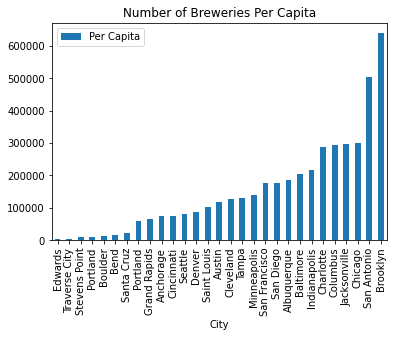

In [46]:
per_cap_plot = brews_per_cap.plot.bar(x='City', y='Per Capita', title = "Number of Breweries Per Capita")

### Now it was time to answer my second question of what style of beer has the most alcohol content by style.

In [47]:
beers_data.head()

,abv,name,style,brewery_id,ounces
0,0.050,Pub Beer,American Pale Lager,408,12.0
1,0.066,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,Rise of the Phoenix,American IPA,177,12.0
3,0.090,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,Sex and Candy,American IPA,177,12.0


### First I wanted to organize the beers into a table that listed how many total beers were in each category of alcohol content from lowest to highest alcohol content by volume(abv).

In [48]:
abv_ranges = [0, .04, .06, .08, .11]

abv_bins = ["Low Alcohol Beers (2%-4%)", "Average Alcohol Beers (4%-6%)", 
            "Strong Alcohol Beers (6%-8%)", "One and Done Beers (>8%)"]

beers_data["Alcohol By Volume"] = pd.cut(beers_data["abv"], abv_ranges, labels=abv_bins)
beers_alcohol_content = beers_data.groupby("Alcohol By Volume")
number_of_beers = beers_data.groupby(["Alcohol By Volume"]).count()["name"]
alcohol_content = pd.DataFrame({"Number of Beers": number_of_beers})
alcohol_content.index.rename("Alcohol Volume", inplace=True)
alcohol_content

,Number of Beers
Alcohol Volume,
Low Alcohol Beers (2%-4%),77
Average Alcohol Beers (4%-6%),1379
Strong Alcohol Beers (6%-8%),699
One and Done Beers (>8%),190


### Now I wanted to check which styles of beer had the highest average alcohol content by volume(abv). I unfortunately did not have a way to merge this data as the Beers data frame did not include "City" and "State" values for each of the beers and this was not part of the question I wanted to answer.

In [51]:
avg_alcohol_content = beers_data.groupby('style')['abv'].mean().sort_values(ascending=False)
avg_alcohol_content.head(50)

style
English Barleywine                    0.107667
Quadrupel (Quad)                      0.104000
American Barleywine                   0.099000
American Malt Liquor                  0.099000
Russian Imperial Stout                0.097636
American Double / Imperial Stout      0.093667
American Double / Imperial IPA        0.087369
Tripel                                0.086818
Baltic Porter                         0.085167
Belgian Strong Pale Ale               0.084000
Belgian Strong Dark Ale               0.083833
Flanders Red Ale                      0.083000
English Strong Ale                    0.081750
English Stout                         0.080000
Old Ale                               0.079500
American Double / Imperial Pilsner    0.077500
American Strong Ale                   0.076538
Scotch Ale / Wee Heavy                0.076267
Braggot                               0.075000
Doppelbock                            0.074714
Belgian Dark Ale                      0.074500
Dubbel 

### Just out of curiosity, I also wanted to see how many beers there were per "style" of beer. 

In [50]:
beers_data['style'].value_counts()

American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
                                 ... 
Grisette                            1
Flanders Oud Bruin                  1
Wheat Ale                           1
Smoked Beer                         1
Kristalweizen                       1
Name: style, Length: 99, dtype: int64

### It appears that among the list of most popular beers along with one of the the highest average alcohol content, the easiest style of beer to look for would be an American Double/Imperial IPA.